<a href="https://colab.research.google.com/github/Edrodriguezcarcamo/Termodinamica/blob/main/3_Introducci%C3%B3n_a_Ciclos_de_Refrigeraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a Ciclos de Refrigeración

Primero, debemos instalar la librería Coolprop en Colab.

http://www.coolprop.org/

La forma de instalar una librería en google colab es la siguiente:

In [1]:
pip install CoolProp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Para poder utilizar la librería, debemos primero importarla, Por ende:

In [2]:
import CoolProp.CoolProp as cp

Si quisiermos evaluar las propiedades de un refrigerante, Coolprop admite una gran cantidad de refrigerantes como fluidos puros, los cuales pueden verse en el siguiente link:

https://coolprop.sourceforge.net/fluid_properties/PurePseudoPure.html#list-of-fluids

Si se quisiera trabajar con el refrigerante R134a, debemos realizar lo siguiente:

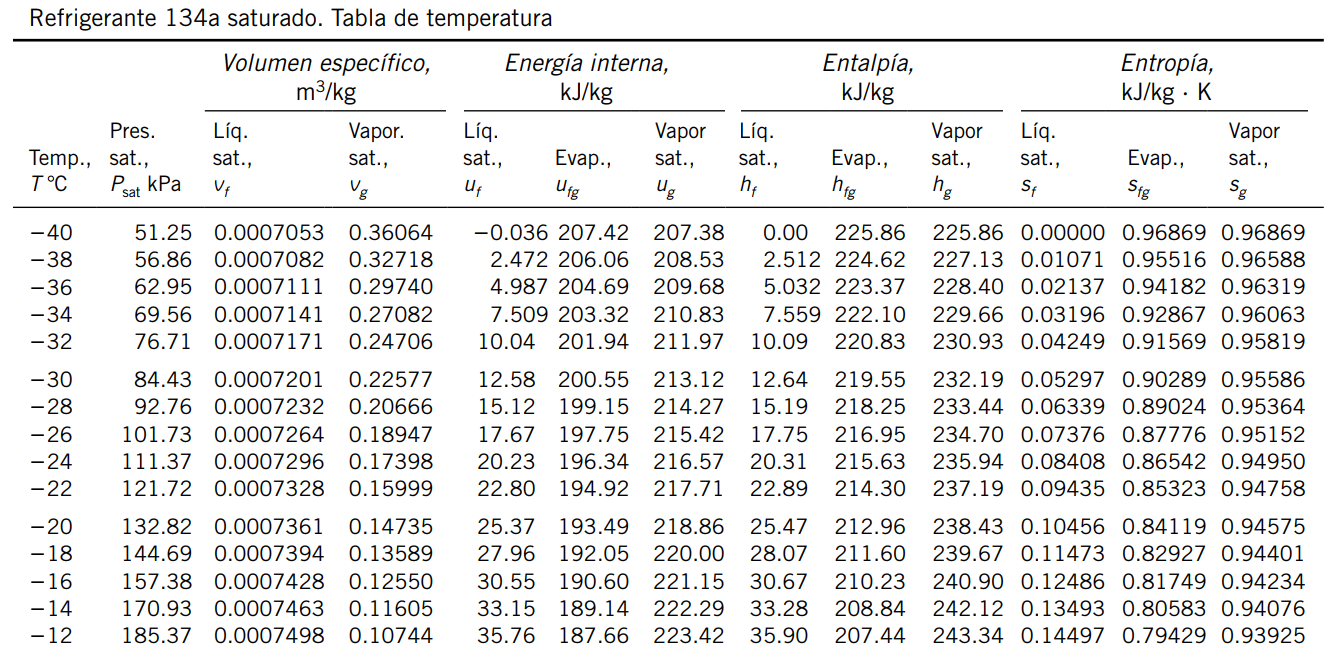

In [3]:
fluid = 'R134a'
T_ref = -30 + 273.15 # K
Q_ref = 0

Y ahora podemos calcular las diferentes propiedades:

In [4]:
enthalpy = cp.PropsSI("H", "T", T_ref, "Q", Q_ref, fluid) # (J/kg)
print(f'Entalpía: {enthalpy/1000:.2f} [kJ/kg]')

entropy = cp.PropsSI("S", "T", T_ref, "Q", Q_ref, fluid) # (J/kg)
print(f'Entropía: {entropy/1000:.5f} [kJ/kg]')

int_energy = cp.PropsSI("U", "T", T_ref, "Q", Q_ref, fluid) # (J/kg)
print(f'Energía interna: {int_energy/1000:.2f} [kJ/kg]')

Entalpía: 160.79 [kJ/kg]
Entropía: 0.84863 [kJ/kg]
Energía interna: 160.73 [kJ/kg]


Pero tenemos un problema, los resultados de Coolprop no son los mismos que en las tablas termodinámicas. ¿Qué esta pasando?

La respuesta es que Coolprop está usando un sistema de referencia diferente para calcular las propiedades termodinámicas. Los sistemas de referencia admitidos por Coolprop son los siguientes:

http://www.coolprop.org/coolprop/HighLevelAPI.html#reference-states

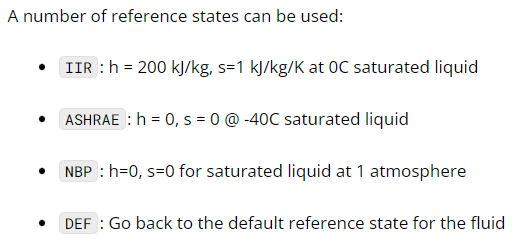

Por ende, para poder tener coherencia entre los resultados de las tablas termodinámicas de los refrigerantes junto a los resultados de Coolprop, debemos agregar una nueva línea de código donde debemos decirle a Coolprop que use el mismo sistema de referencia que usan las tablas termodinámicas, que en este caso es la ASHRAE.

In [5]:
cp.set_reference_state('R134a','ASHRAE') # seteo del estado de referencia a la ASHRAE

fluid = 'R134a'
T_ref = -30 + 273.15 # K
Q_ref = 0

enthalpy = cp.PropsSI("H", "T", T_ref, "Q", Q_ref, fluid) # (J/kg)
print(f'Entalpía: {enthalpy/1000:.2f} [kJ/kg]')

entropy = cp.PropsSI("S", "T", T_ref, "Q", Q_ref, fluid) # (J/kg)
print(f'Entropía: {entropy/1000:.5f} [kJ/kg]')

int_energy = cp.PropsSI("U", "T", T_ref, "Q", Q_ref, fluid) # (J/kg)
print(f'Energía interna: {int_energy/1000:.2f} [kJ/kg]')

Entalpía: 12.65 [kJ/kg]
Entropía: 0.05301 [kJ/kg]
Energía interna: 12.59 [kJ/kg]


Probemos ahora con otro fluido, por ejemplo el R22:

In [6]:
cp.set_reference_state('R22','ASHRAE')

fluid = 'R22'

enthalpy = cp.PropsSI("H", "T", T_ref, "Q", Q_ref, fluid) # (J/kg)
print(f'Entalpía: {enthalpy/1000:.2f} [kJ/kg]')

entropy = cp.PropsSI("S", "T", T_ref, "Q", Q_ref, fluid) # (J/kg)
print(f'Entropía: {entropy/1000:.5f} [kJ/kg]')

int_energy = cp.PropsSI("U", "T", T_ref, "Q", Q_ref, fluid) # (J/kg)
print(f'Energía interna: {int_energy/1000:.2f} [kJ/kg]')

Entalpía: 11.00 [kJ/kg]
Entropía: 0.04600 [kJ/kg]
Energía interna: 10.88 [kJ/kg]


Ahora, que tal si no conocemos la fase en la cual se encuentra el agua, pero sabemos que se encuentra a una temperatura de 300 K y una presión de 120 kPa. Entonces, para conocer en que fase se encuentra podemos utilizar el siguiente código:

In [7]:
fluid = "R123"
T_ref = 500 # K
P_ref = 12000 # Pa

phase = cp.PhaseSI("T", T_ref, "P", P_ref, fluid)
phase

'supercritical_gas'